### ML in 20 Days Complete Notebook 

### Name : Ijaz Ullah

### My github : https://github.com/ijazkhan101/Machine-Learning-with-Python-20Days

### 1st assignment of ML

### Pipeline
It is used to execute the process sequentially and execute the steps, transformers, or estimators are named manually

### make_pipeline
make_pipleine is an advanced method in scikit learn, in which the naming of the estimators or transformers are done automatically.

### Assigment Day 2 : KKN Pipelines Date 12/12/2022


In [1]:
import matplotlib.pylab as plt 
from sklearn.metrics import mean_squared_error 
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

In [2]:
X,y = load_boston(return_X_y=True)

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

In [3]:
pipe =Pipeline([("scaler:",StandardScaler()),("Algo",KNeighborsRegressor())])

In [4]:
pipe

Pipeline(steps=[('scaler:', StandardScaler()), ('Algo', KNeighborsRegressor())])

In [5]:
pipe.fit(X,y)

Pipeline(steps=[('scaler:', StandardScaler()), ('Algo', KNeighborsRegressor())])

In [6]:
predicted_y=pipe.predict(X)

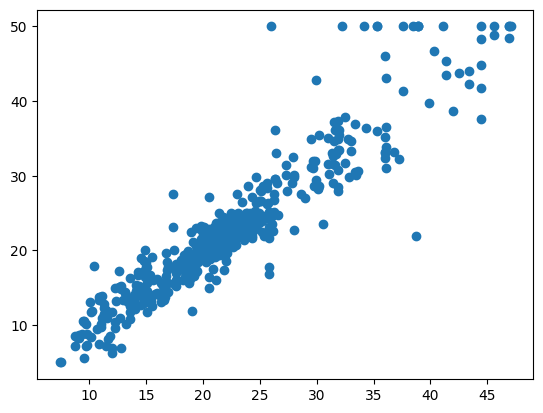

In [7]:
plt.scatter(predicted_y,y)

### 2nd Assigment RandomizedSearchCV  

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.

In [8]:
import matplotlib.pylab as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import uniform
import warnings 
warnings.filterwarnings('ignore')

In [9]:
X,y = load_boston(return_X_y=True)

In [10]:
pipe =Pipeline([
    ('scaler',StandardScaler()),
    ("algo",KNeighborsRegressor())]
)

In [11]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('algo', KNeighborsRegressor())],
 'verbose': False,
 'scaler': StandardScaler(),
 'algo': KNeighborsRegressor(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'algo__algorithm': 'auto',
 'algo__leaf_size': 30,
 'algo__metric': 'minkowski',
 'algo__metric_params': None,
 'algo__n_jobs': None,
 'algo__n_neighbors': 5,
 'algo__p': 2,
 'algo__weights': 'uniform'}

In [12]:
# using RandomizedSearchCV
model =RandomizedSearchCV(
    estimator=pipe,
    param_distributions ={'algo__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},
    cv=5
)

In [13]:
model

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('algo', KNeighborsRegressor())]),
                   param_distributions={'algo__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10]})

In [14]:
model.fit(X, y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('algo', KNeighborsRegressor())]),
                   param_distributions={'algo__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10]})

In [15]:
model.predict(X)

array([25.96666667, 23.02222222, 32.57777778, 28.26666667, 30.42222222,
       26.51111111, 21.63333333, 19.31111111, 18.63333333, 20.16666667,
       19.31111111, 20.6       , 20.85555556, 19.2       , 18.26666667,
       19.74444444, 21.86666667, 17.08888889, 20.24444444, 18.76666667,
       14.96666667, 17.21111111, 15.47777778, 15.37777778, 15.57777778,
       15.26666667, 16.08888889, 14.96666667, 17.4       , 20.33333333,
       14.44444444, 16.52222222, 13.83333333, 14.97777778, 13.83333333,
       20.01111111, 20.95555556, 21.41111111, 22.65555556, 30.47777778,
       32.75555556, 24.64444444, 24.27777778, 24.27777778, 21.71111111,
       21.81111111, 21.44444444, 20.24444444, 16.44444444, 19.96666667,
       20.11111111, 21.64444444, 24.71111111, 22.26666667, 20.05555556,
       31.47777778, 26.34444444, 31.66666667, 23.66666667, 22.35555556,
       19.44444444, 18.68888889, 22.4       , 23.6       , 27.14444444,
       25.34444444, 22.2       , 22.46666667, 19.8       , 21.17

In [16]:
import pandas as pd 
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004201,0.001166,0.003800,0.000981,1,{'algo__n_neighbors': 1},0.339313,0.423779,0.534566,0.486373,-1.623928,0.032020,0.830549,10
1,0.009799,0.005636,0.014401,0.013558,2,{'algo__n_neighbors': 2},0.441649,0.547962,0.474980,0.496794,-0.548699,0.282537,0.417052,9
2,0.014000,0.005798,0.015204,0.015716,3,{'algo__n_neighbors': 3},0.520304,0.593339,0.547746,0.513891,0.002980,0.435652,0.218139,8
3,0.016707,0.011601,0.028407,0.018448,4,{'algo__n_neighbors': 4},0.547088,0.606925,0.509770,0.490452,0.211278,0.473103,0.136807,7
4,0.009113,0.006859,0.012408,0.008546,5,{'algo__n_neighbors': 5},0.560895,0.619174,0.486619,0.469869,0.231330,0.473577,0.132431,6
5,0.016599,0.019577,0.016598,0.010109,6,{'algo__n_neighbors': 6},0.582450,0.621194,0.509111,0.446859,0.250417,0.482006,0.130434,5
6,0.020199,0.013286,0.006401,0.004411,7,{'algo__n_neighbors': 7},0.602434,0.636185,0.516102,0.442088,0.245749,0.488512,0.139022,4
7,0.006397,0.002248,0.006572,0.002540,8,{'algo__n_neighbors': 8},0.615090,0.631185,0.551340,0.440117,0.239072,0.495361,0.144674,3
8,0.004000,0.000898,0.005218,0.002063,9,{'algo__n_neighbors': 9},0.625314,0.630621,0.564464,0.429107,0.279376,0.505776,0.134503,1
9,0.007001,0.001900,0.004795,0.001158,10,{'algo__n_neighbors': 10},0.614446,0.652489,0.555555,0.420648,0.261128,0.500853,0.143381,2


### Model Grid Search CV  : Model grid search CV in scikit learn (Part-2)

Grid Search is an effective method for adjusting the parameters in supervised learning and improve the generalization performance of a model. With Grid Search, we try all possible combinations of the parameters of interest and find the best ones.

In [18]:
import matplotlib.pylab as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
import warnings 
warnings.filterwarnings('ignore')

In [19]:
X,y =load_boston(return_X_y=True)

In [20]:
pipe =Pipeline([
    ('scaler',StandardScaler()),
    ("algo",KNeighborsRegressor())]
)

In [21]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('algo', KNeighborsRegressor())],
 'verbose': False,
 'scaler': StandardScaler(),
 'algo': KNeighborsRegressor(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'algo__algorithm': 'auto',
 'algo__leaf_size': 30,
 'algo__metric': 'minkowski',
 'algo__metric_params': None,
 'algo__n_jobs': None,
 'algo__n_neighbors': 5,
 'algo__p': 2,
 'algo__weights': 'uniform'}

In [22]:
model =GridSearchCV(
    estimator=pipe,
    param_grid= {'algo__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},
    cv=5
)

In [23]:
model.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('algo', KNeighborsRegressor())]),
             param_grid={'algo__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [24]:
model.predict(X)

array([25.96666667, 23.02222222, 32.57777778, 28.26666667, 30.42222222,
       26.51111111, 21.63333333, 19.31111111, 18.63333333, 20.16666667,
       19.31111111, 20.6       , 20.85555556, 19.2       , 18.26666667,
       19.74444444, 21.86666667, 17.08888889, 20.24444444, 18.76666667,
       14.96666667, 17.21111111, 15.47777778, 15.37777778, 15.57777778,
       15.26666667, 16.08888889, 14.96666667, 17.4       , 20.33333333,
       14.44444444, 16.52222222, 13.83333333, 14.97777778, 13.83333333,
       20.01111111, 20.95555556, 21.41111111, 22.65555556, 30.47777778,
       32.75555556, 24.64444444, 24.27777778, 24.27777778, 21.71111111,
       21.81111111, 21.44444444, 20.24444444, 16.44444444, 19.96666667,
       20.11111111, 21.64444444, 24.71111111, 22.26666667, 20.05555556,
       31.47777778, 26.34444444, 31.66666667, 23.66666667, 22.35555556,
       19.44444444, 18.68888889, 22.4       , 23.6       , 27.14444444,
       25.34444444, 22.2       , 22.46666667, 19.8       , 21.17

In [25]:
import pandas as pd 
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004601,0.001199,0.006200,0.002480,1,{'algo__n_neighbors': 1},0.339313,0.423779,0.534566,0.486373,-1.623928,0.032020,0.830549,10
1,0.006798,0.002926,0.006399,0.001358,2,{'algo__n_neighbors': 2},0.441649,0.547962,0.474980,0.496794,-0.548699,0.282537,0.417052,9
2,0.006999,0.003347,0.009402,0.005679,3,{'algo__n_neighbors': 3},0.520304,0.593339,0.547746,0.513891,0.002980,0.435652,0.218139,8
3,0.012800,0.005112,0.007400,0.003929,4,{'algo__n_neighbors': 4},0.547088,0.606925,0.509770,0.490452,0.211278,0.473103,0.136807,7
4,0.011594,0.013217,0.006803,0.001721,5,{'algo__n_neighbors': 5},0.560895,0.619174,0.486619,0.469869,0.231330,0.473577,0.132431,6
5,0.010602,0.005124,0.004599,0.002246,6,{'algo__n_neighbors': 6},0.582450,0.621194,0.509111,0.446859,0.250417,0.482006,0.130434,5
6,0.008600,0.007890,0.008600,0.005127,7,{'algo__n_neighbors': 7},0.602434,0.636185,0.516102,0.442088,0.245749,0.488512,0.139022,4
7,0.011997,0.010859,0.006204,0.000982,8,{'algo__n_neighbors': 8},0.615090,0.631185,0.551340,0.440117,0.239072,0.495361,0.144674,3
8,0.007401,0.003008,0.006802,0.002313,9,{'algo__n_neighbors': 9},0.625314,0.630621,0.564464,0.429107,0.279376,0.505776,0.134503,1
9,0.005400,0.001198,0.008003,0.003290,10,{'algo__n_neighbors': 10},0.614446,0.652489,0.555555,0.420648,0.261128,0.500853,0.143381,2


### 2nd assignmnet 

### Data Pre-processing Assignment (12/Dec 2022) : Name : Ijaz Ullah

### 1: Mean Absolute Error(MAE)

Mean absolute error is a measure of errors between paired observations expressing the same phenomenon The Mean absolute error is calculated by adding up all the absolute errors and dividing them by the number of errors.

MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set

In [26]:
# import the library
from sklearn.metrics import mean_absolute_error as MEA

In [27]:
 #actual and calculated numbers
actual = [13, 15, 15, 19]
calculated = [13, 13, 18, 17]
  
# calculate MAE
error = MEA(actual, calculated)
  
# display
print("Mean absolute error : " +str(error))

Mean absolute error : 1.75


### 2: Mean Squared Error(MSE)

Mean Squared Error evaluates the proximity of a regression line to a group of data points.

Mean squared error (MSE) is a measure of the error in prediction algorithms. This statistic quantifies the average squared variance between observed and predicted values. When there are no errors in a model, the MSE equals 0

MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.

It is an estimator measures the average of error squares 

In [28]:
from sklearn.metrics import mean_squared_error


In [29]:

# Given values
Y_true = [1,1,2,2,4] # Y_true = Y (original values)

# calculated values
Y_pred = [1.10,1.29,1.99,2.69,3.4] # Y_pred = Y'

# Calculation of Mean Squared Error (MSE)
mean_squared_error(Y_true,Y_pred)

0.18606

### 3.Root mean squared error (RMSE)

RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.

RSME (Root mean square error) calculates the transformation between values predicted by a model and actual values

Using RSME, we can easily measure the efficiency of the model.

RMSE is the square root of MSE. In case of unbiased estimator, RMSE is just the square root of variance, which is actually Standard Deviation

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
import math
actual= [34, 37, 44, 47, 48, 48, 46, 43, 32, 27, 26, 24]
pred = [37, 40, 46, 44, 46, 50, 45, 44, 34, 30, 22, 23]
 

In [32]:
# Calculation of Mean Squared Error (MSE)
MSE = mean_squared_error(actual, pred)

In [33]:
# Taking suare of  Mean Squared Error (MSE)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error   Is:\n")
print(RMSE)

Root Mean Square Error   Is:

2.4324199198877374


### 4.Root Mean Squared Logarithmic Error (RMSLE)

RMSLE metric only considers the relative error between Predicted and the actual value and the scale of the error is not significant. On the other hand, RMSE value Increases in magnitude if the scale of error increases.

RMSLE is more precise than RMSE for data with larger variance.

RMSLE measures the ratio between actual and predicted.

 RMSLE, you take the log of the predictions and actual values. So basically, what changes is the variance that you are measuring.RMSLE is usually used when you don't want to penalize huge differences in the predicted and the actual values when both predicted and true values are huge numbers.


If both predicted and actual values are small: RMSE and RMSLE is same.

If either predicted or the actual value is big: RMSE > RMSLE

If both predicted and actual values are big: RMSE > RMSLE (RMSLE becomes almost negligible)

In [34]:
import numpy as np 
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_log_error

In [35]:
actual = np.array([56,45,68,49,26,40,52,38,30,48])
predicted = np.array([58,42,65,47,29,46,50,33,31,47])

In [36]:
print(mean_squared_log_error( actual, predicted, squared=False))


0.07801965746150723


### 5. R-squared 

R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

It measures the proportion of the variation in your dependent variable explained by all of your independent variables in the model

In [37]:
import numpy as np 
import sklearn.metrics as metrics

In [38]:
y = np.array([-3, -1, -2, 1, -1, 1, 2, 1, 3, 4, 3, 5])
Y_pred = np.array([-2, 1, -1, 0, -1, 1, 2, 2, 3, 3, 3, 5])

In [39]:
# R suqared
r2  = metrics.r2_score(y,Y_pred)
r2

0.8655043586550436

### 6. Adjusted R square

It measures the proportion of variation explained by only those independent variables that really help in explaining the dependent variable. It penalizes you for adding independent variable that do not help in predicting the dependent variable.

Adjusted R-Squared can be calculated mathematically in terms of sum of squares. The only difference between R-square and Adjusted R-square equation is degree of freedom

Both R2 and the adjusted R2 give you an idea of how many data points fall within the line of the regression equation. However, there is one main difference between R2 and the adjusted R2: R2 assumes that every single variable explains the variation in the dependent variable. The adjusted R2 tells you the percentage of variation explained by only the independent variables that actually affect the dependent variable.

In [40]:
import numpy as np 
import sklearn.metrics as metrics

In [41]:
actual = np.array([56,45,68,49,26,40,52,38,30,48])
predicted = np.array([58,42,65,47,29,46,50,33,31,47])

In [42]:
#calculate r-squared
r2_sk = metrics.r2_score(actual,predicted)
N=actual.shape[0]
p=3
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.7982565379825655


### Regression Accuracy Check in Python (MAE, MSE, RMSE, R-Squared)

In [43]:
import numpy as np 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error

In [44]:
y = np.array([-3, -1, -2, 1, -1, 1, 2, 1, 3, 4, 3, 5])
Y_pred = np.array([-2, 1, -1, 0, -1, 1, 2, 2, 3, 3, 3, 5])
x = list(range(len(y)))


We can visualize them in a plot to check the difference visually.

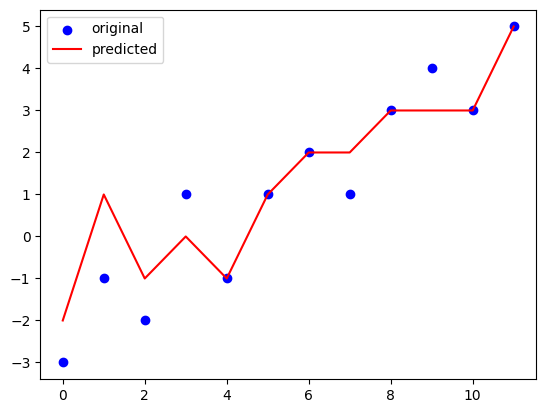

In [45]:
plt.scatter(x, y, color="blue", label="original")
plt.plot(x, Y_pred, color="red", label="predicted")
plt.legend()
plt.show() 

In [46]:
mae = metrics.mean_absolute_error(y, Y_pred)
mse = metrics.mean_squared_error(y, Y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y,Y_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.5833333333333334
MSE: 0.75
RMSE: 0.8660254037844386
R-Squared: 0.8655043586550436


### Assignment (12/ Dec 2022)  Preprocessing Categorical Data

Categorical data is a type of data that can be stored into groups or categories with the aid of names or labels. This grouping is usually made according to the data characteristics and similarities of these characteristics through a method known as matching

there are two kinds of categorical data-

Ordinal Data: The categories have an inherent order


Nominal Data: The categories do not have an inherent order

### Label Encoding or Ordinal Encoding

This type of encoding is used when the variables in the data are ordinal, ordinal encoding converts each label into integer values and the encoded data represents the sequence of labels

In Label encoding, each label is converted into an integer value.

In [47]:
from sklearn.preprocessing import OrdinalEncoder

In [48]:
encoding = OrdinalEncoder()

In [49]:
X = [['Male', 1], ['Female', 3], ['Female', 2]]

In [50]:
#Fit the OrdinalEncoder to X.
encoding.fit(X)

OrdinalEncoder()

In [51]:
encoding.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [52]:
# 	Transform X to ordinal codes.
encoding.transform([['Female', 3], ['Male', 1]])

array([[0., 2.],
       [1., 0.]])

### 2. One Hot Encoding 

We use this categorical data encoding technique when the features are nominal(do not have any order). In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category.

The goal of one-hot encoding is to transform data from a categorical representation to a numeric representation.

In [53]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

ids = [11, 22, 33, 44, 55, 66, 77]
countries = ['Spain', 'France', 'Spain', 'Germany', 'France']

df = pd.DataFrame(list(zip(ids, countries)),
                  columns=['Ids', 'Countries'])

In [54]:
df

,Ids,Countries
0,11,Spain
1,22,France
2,33,Spain
3,44,Germany
4,55,France


In [55]:
#antiate the LabelBinarizer and fit it:
y = LabelBinarizer().fit_transform(df.Countries)
y

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [56]:
#let's populate a list and fit it in the encoder:
x = [[11, "Spain"], [22, "France"], [33, "Spain"], [44, "Germany"], [55, "France"]]

In [57]:
y = OneHotEncoder().fit_transform(x).toarray()
print(y)

[[1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0.]]


### 3.Dummy Encoding 

Dummy coding scheme is similar to one-hot encoding. This categorical data encoding method transforms the categorical variable into a set of binary variables (also known as dummy variables). In the case of one-hot encoding, for N categories in a variable, it uses N binary variables. The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses N-1 features to represent N labels/categories.

In [58]:
import category_encoders as ce
import pandas as pd
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
                   'C': [1, 2, 3]})
#Original Data
df

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [59]:
#encode the data
data_encoded=pd.get_dummies(data=df,drop_first=True)
data_encoded

,C,A_b,B_b,B_c
0,1,0,1,0
1,2,1,0,0
2,3,0,0,1


### 4.Effect Encoding


This encoding technique is also known as Deviation Encoding or Sum Encoding. Effect encoding is almost similar to dummy encoding, with a little difference. In dummy coding, we use 0 and 1 to represent the data but in effect encoding, we use three values i.e. 1,0, and -1.

In [60]:
import category_encoders as ce
import pandas as pd
data=pd.DataFrame({'City':['Delhi','Mumbai','Hyderabad','Chennai','Bangalore','Delhi','Hyderabad']}) 
encoder=ce.sum_coding.SumEncoder(cols='City',verbose=False,)

#Original Data
data

,City
0,Delhi
1,Mumbai
2,Hyderabad
3,Chennai
4,Bangalore
5,Delhi
6,Hyderabad


In [61]:
encoder.fit_transform(data)

,intercept,City_0,City_1,City_2,City_3
0,1,1.0,0.0,0.0,0.0
1,1,0.0,1.0,0.0,0.0
2,1,0.0,0.0,1.0,0.0
3,1,0.0,0.0,0.0,1.0
4,1,-1.0,-1.0,-1.0,-1.0
5,1,1.0,0.0,0.0,0.0
6,1,0.0,0.0,1.0,0.0


### 5.Binary Encoding

Binary encoding for categorical variables, similar to onehot, but stores categories as binary bitstrings.

In [62]:
import category_encoders as ce

In [63]:
import pandas as pd
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c']})
#Original Data
df

,A,B
0,a,b
1,b,a
2,a,c


In [64]:
X_trans = ce.BinaryEncoder().fit_transform(df)
X_trans.head()

,A_0,A_1,B_0,B_1
0,0,1,0,1
1,1,0,1,0
2,0,1,1,1


### 6.BaseN Encoding

In a positional number system, base or radix is the number of unique digits including zero used to represent numbers. In base n encoding if the base is two then the encoder will convert categories into the numerical form using their respective binary form which is formally one-hot encoding

In [65]:
import category_encoders as ce
import pandas as pd

In [66]:
data=pd.DataFrame({'Month':['January','April','March','April',
'Februay','June','July','June','September']})

data


,Month
0,January
1,April
2,March
3,April
4,Februay
5,June
6,July
7,June
8,September


In [67]:
#Create an object for Base N Encoding
encoder= ce.BaseNEncoder(cols=['Month'],return_df=True,base=5)

#Fit and Transform Data
data_encoded=encoder.fit_transform(data)

data_encoded

,Month_0,Month_1
0,0,1
1,0,2
2,0,3
3,0,2
4,0,4
5,1,0
6,1,1
7,1,0
8,1,2


### 7.Hash Encoding 

Just like One-Hot encoding, the hash encoder converts the category into binary numbers using new data variables but here we can fix the number of new data variables

In [68]:
data=pd.DataFrame({'Month':['January','April','March','April',
'Februay','June','July','June','September']})

#Create object for hash encoder
encoder=ce.HashingEncoder(cols='Month',n_components=6)#Fit and Transform Data
encoder.fit_transform(data)

,col_0,col_1,col_2,col_3,col_4,col_5
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
5,0,1,0,0,0,0
6,1,0,0,0,0,0
7,0,1,0,0,0,0
8,0,0,0,0,1,0


### 8.Target Encoding

Target encoding is the method of converting a categorical value into the mean of the target variable. This type of encoding is a type of bayesian encoding method where bayesian encoders use target variables to encode the categorical value.

In [69]:
df=pd.DataFrame({'name':[
'rahul','ashok','ankit','rahul','ashok','ankit'
],'marks' : [10,20,30,60,70,80,]})

df

,name,marks
0,rahul,10
1,ashok,20
2,ankit,30
3,rahul,60
4,ashok,70
5,ankit,80


In [70]:
#Create target encoding object
encoder=ce.TargetEncoder(cols='name') 

#Fit and Transform Train Data
encoder.fit_transform(df['name'],df['marks'])

,name
0,37.689414
1,45.000000
2,52.310586
3,37.689414
4,45.000000
5,52.310586


### end of assignment 